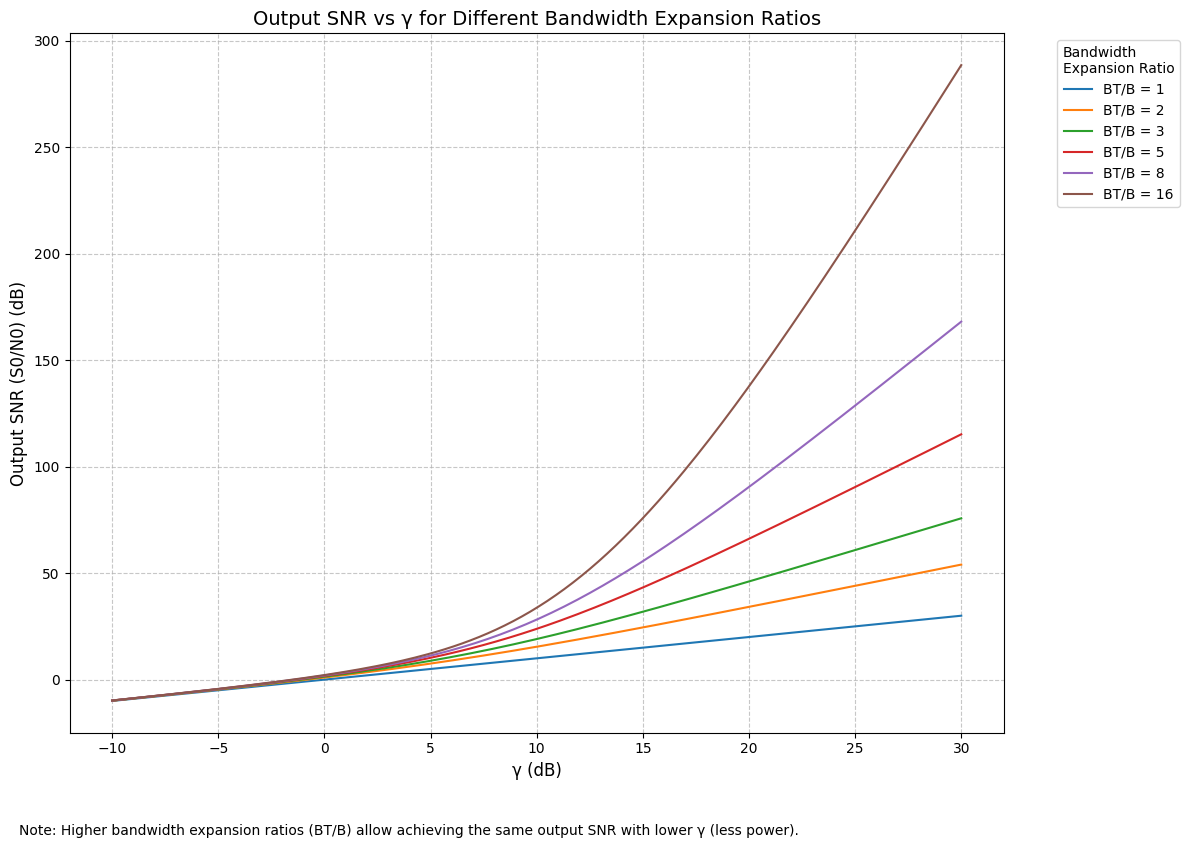

<Figure size 640x480 with 0 Axes>

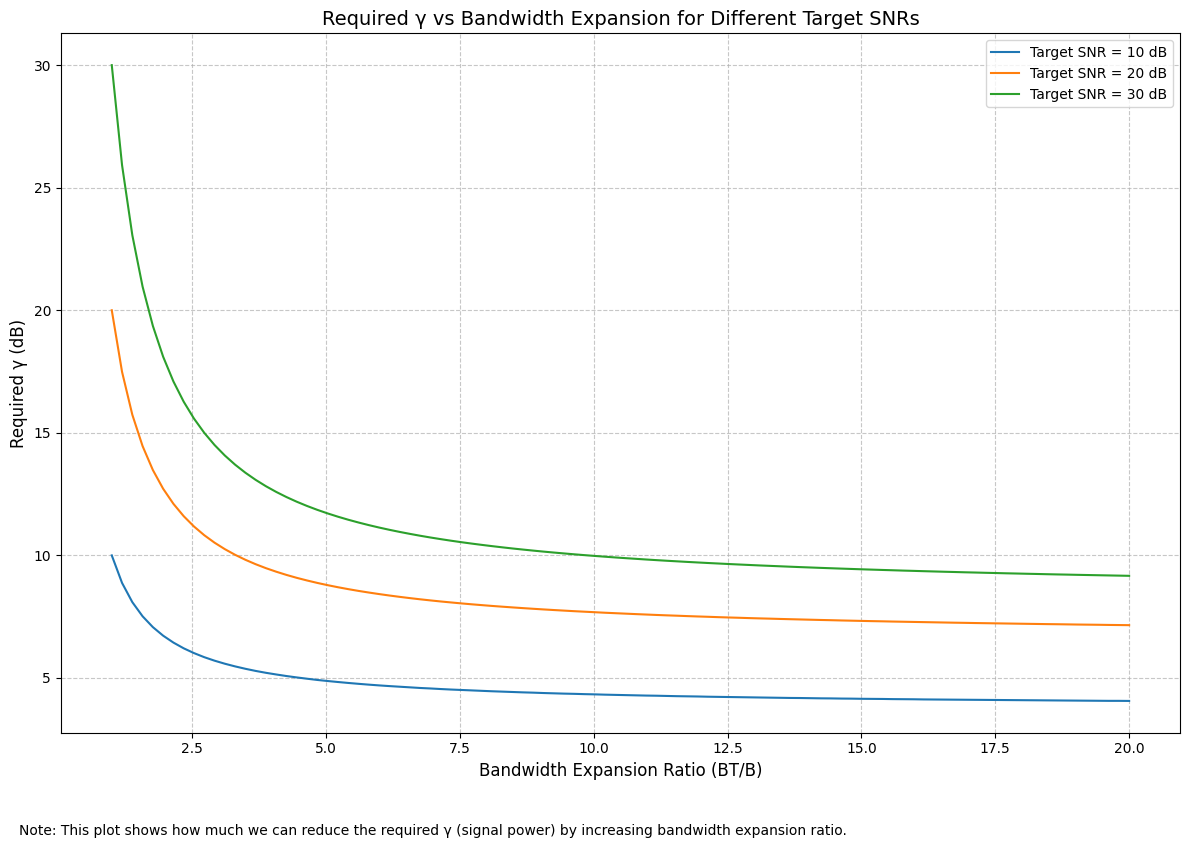

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_snr(gamma, bt_b_ratio):
    """
    Calculate output SNR given gamma and bandwidth expansion ratio.

    Parameters:
    gamma (float or array): SNR per unit bandwidth (Si/NB) in linear scale
    bt_b_ratio (float): Bandwidth expansion ratio (BT/B)

    Returns:
    float or array: Output SNR (S0/N0) in linear scale
    """
    # Use the exact formula: S0/N0 = (1 + γ/(BT/B))^(BT/B) - 1
    return np.power(1 + gamma/bt_b_ratio, bt_b_ratio) - 1

def plot_snr_vs_gamma():
    """
    Create plots showing the relationship between gamma and output SNR
    for different bandwidth expansion ratios.
    """
    # Create range of gamma values in dB (-10 to 30 dB)
    gamma_db = np.linspace(-10, 30, 200)
    gamma_linear = 10**(gamma_db/10)  # Convert dB to linear scale

    # Different bandwidth expansion ratios to plot
    bt_b_ratios = [1, 2, 3, 5, 8, 16]

    # Create main plot
    plt.figure(figsize=(12, 8))

    # Plot for each bandwidth expansion ratio
    for bt_b in bt_b_ratios:
        snr_out = calculate_snr(gamma_linear, bt_b)
        snr_out_db = 10 * np.log10(snr_out)  # Convert to dB
        plt.plot(gamma_db, snr_out_db, label=f'BT/B = {bt_b}')

    # Customize the plot
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.xlabel('γ (dB)', fontsize=12)
    plt.ylabel('Output SNR (S0/N0) (dB)', fontsize=12)
    plt.title('Output SNR vs γ for Different Bandwidth Expansion Ratios',
              fontsize=14)
    plt.legend(title='Bandwidth\nExpansion Ratio',
              bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add explanatory text
    plt.figtext(0.02, -0.05,
                "Note: Higher bandwidth expansion ratios (BT/B) allow achieving "
                "the same output SNR with lower γ (less power).",
                wrap=True, horizontalalignment='left', fontsize=10)

    plt.tight_layout()
    return plt

def plot_power_savings():
    """
    Create a plot showing power savings achieved through bandwidth expansion
    for a target output SNR.
    """
    # Create range of bandwidth expansion ratios
    bt_b_ratios = np.linspace(1, 20, 100)

    # Target output SNRs to consider (in dB)
    target_snrs_db = [10, 20, 30]

    plt.figure(figsize=(12, 8))

    for target_snr_db in target_snrs_db:
        target_snr_linear = 10**(target_snr_db/10)
        required_gamma = []

        # For each BT/B, find required gamma to achieve target SNR
        for bt_b in bt_b_ratios:
            # Binary search to find required gamma
            gamma_low, gamma_high = 0.1, 1000
            while gamma_high - gamma_low > 0.001:
                gamma_mid = (gamma_low + gamma_high) / 2
                snr = calculate_snr(gamma_mid, bt_b)
                if snr < target_snr_linear:
                    gamma_low = gamma_mid
                else:
                    gamma_high = gamma_mid
            required_gamma.append(gamma_mid)

        # Convert to dB for plotting
        required_gamma_db = 10 * np.log10(required_gamma)
        plt.plot(bt_b_ratios, required_gamma_db,
                label=f'Target SNR = {target_snr_db} dB')

    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.xlabel('Bandwidth Expansion Ratio (BT/B)', fontsize=12)
    plt.ylabel('Required γ (dB)', fontsize=12)
    plt.title('Required γ vs Bandwidth Expansion for Different Target SNRs',
              fontsize=14)
    plt.legend()

    plt.figtext(0.02, -0.05,
                "Note: This plot shows how much we can reduce the required γ "
                "(signal power) by increasing bandwidth expansion ratio.",
                wrap=True, horizontalalignment='left', fontsize=10)

    plt.tight_layout()
    return plt

# Generate and display both plots
if __name__ == "__main__":
    # Plot SNR vs gamma
    plot_snr_vs_gamma()
    plt.figure()

    # Plot power savings
    plot_power_savings()
    plt.show()